# Lab 6: Visualization of Multi-Dimensional Data



**Description:**

- Numeric features: math score, reading score, writing score.
- Categorical features: gender, race/ethnicity, parental level of education, lunch, test preparation course.
- Using 'gender' as the main category and create an 'average score' as a fourth numeric feature.

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

df = pd.read_csv('data/StudentsPerformance.csv')

df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


## 1. Parallel Coordinates Plot

We'll visualize four numeric features (math, reading, writing, average score) colored by gender.

**Parallel coordinates** help reveal multivariate patterns, such as how groups differ across several features at once, and can highlight clusters or outliers.

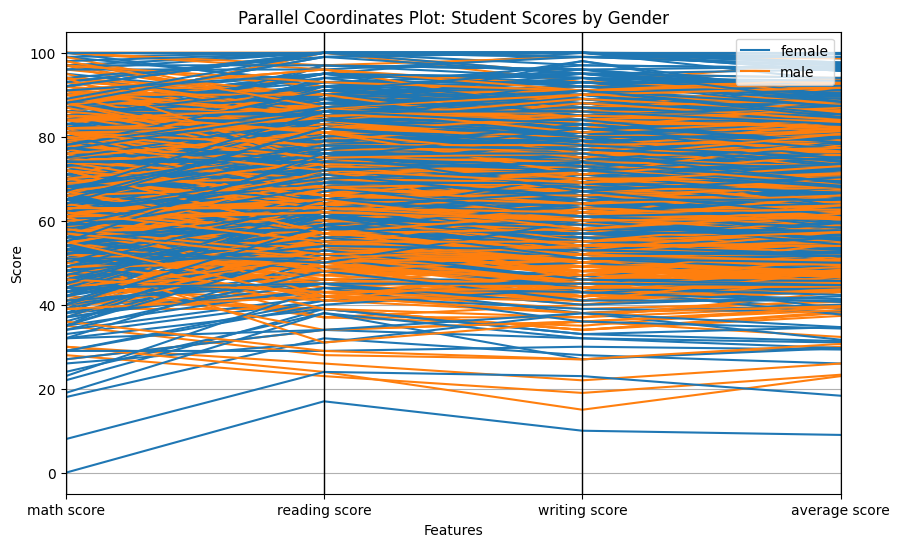

In [3]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10,6))
parallel_coordinates(
    df[['gender', 'math score', 'reading score', 'writing score', 'average score']],
    'gender',
    color=['#1f77b4', '#ff7f0e']
)
plt.title('Parallel Coordinates Plot: Student Scores by Gender')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

**Observation:**
- Female students tend to have higher reading and writing scores, while male students have a slight edge in math.
- Parallel coordinates make it easy to spot these trends across all features at once.

## 2. Scatter Matrix (Pandas)

A scatter matrix shows pairwise relationships between numeric features, colored by gender.

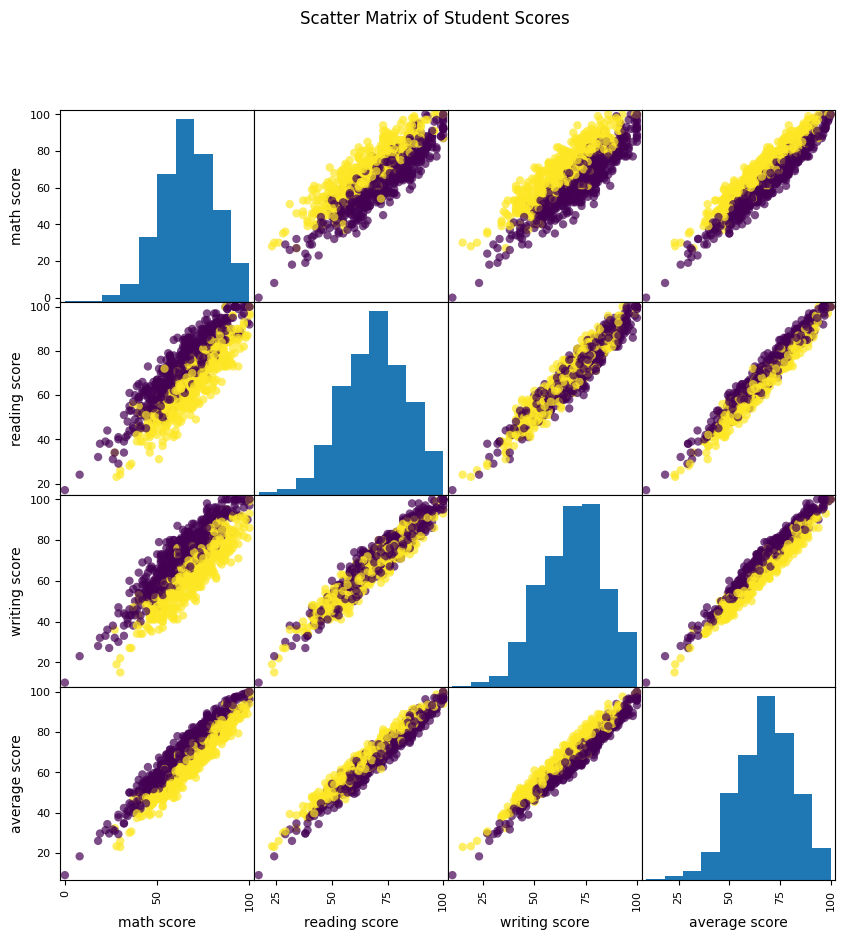

In [4]:
pd.plotting.scatter_matrix(
    df[['math score', 'reading score', 'writing score', 'average score']],
    figsize=(10,10),
    diagonal='hist',
    alpha=0.7,
    c=df['gender'].map({'female': 0, 'male': 1}),
    marker='o'
)
plt.suptitle('Scatter Matrix of Student Scores')
plt.show()

**Observation:**
- Strong positive relationship between reading and writing scores.
- Math score shows more overlap between genders, indicating less separation.

## 3. Seaborn Pairplot

A pairplot provides a grid of scatterplots and histograms, colored by gender.

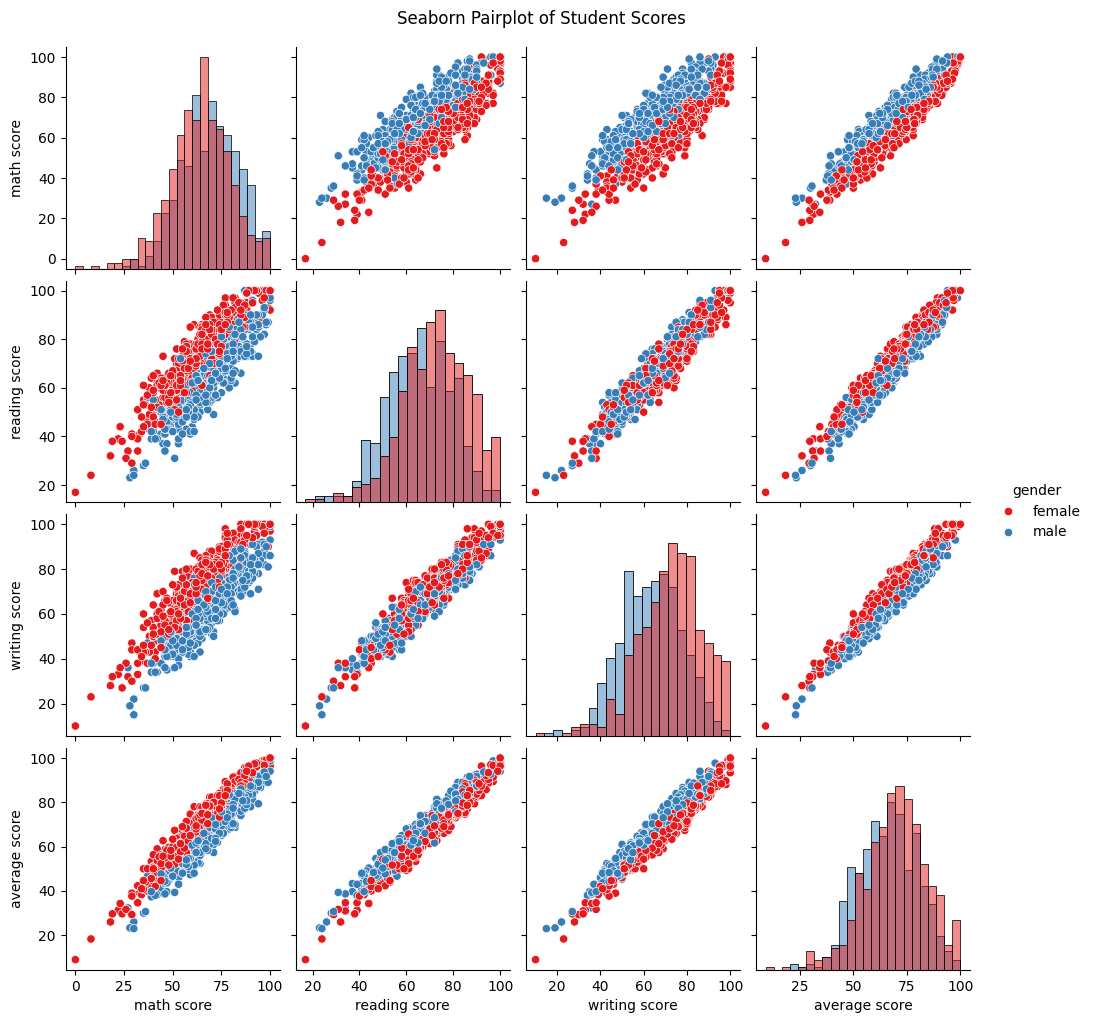

In [5]:
sns.pairplot(
    df,
    vars=['math score', 'reading score', 'writing score', 'average score'],
    hue='gender',
    palette='Set1',
    diag_kind='hist'
)
plt.suptitle('Seaborn Pairplot of Student Scores', y=1.02)
plt.show()

**Observation:**
- Clear clusters for reading and writing scores by gender.
- Some outliers visible, especially in math scores.

## 4. PCA Projection

We'll use PCA to reduce the four numeric features to two principal components and plot them, colored by gender.

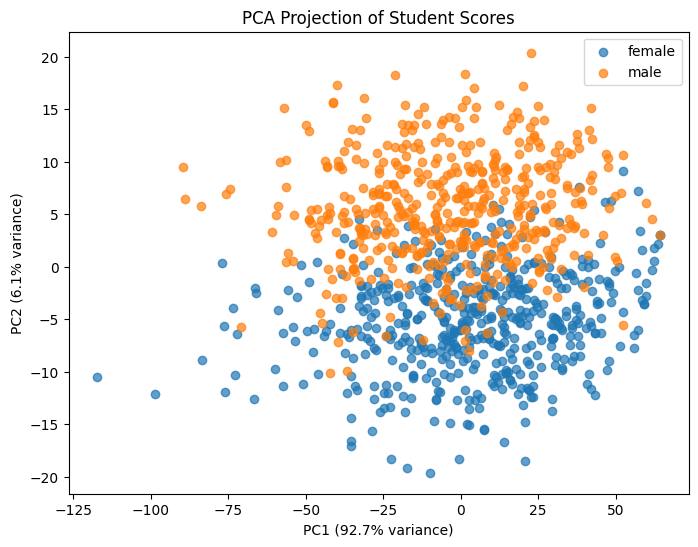

In [6]:
features = ['math score', 'reading score', 'writing score', 'average score']
X = df[features].values
y = df['gender'].map({'female': 0, 'male': 1}).values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained = pca.explained_variance_ratio_ * 100

plt.figure(figsize=(8,6))
for i, label, color in zip([0,1], ['female', 'male'], ['#1f77b4', '#ff7f0e']):
    plt.scatter(X_pca[y==i,0], X_pca[y==i,1], label=label, alpha=0.7, c=color)
plt.xlabel(f'PC1 ({explained[0]:.1f}% variance)')
plt.ylabel(f'PC2 ({explained[1]:.1f}% variance)')
plt.title('PCA Projection of Student Scores')
plt.legend()
plt.show()

**Observation:**
- PCA separates the genders moderately well, especially along PC2.
- Most variance is explained by PC1, which combines all score types.

## 5. t-SNE Embedding

We'll use t-SNE to embed the four numeric features into two dimensions and plot, colored by gender.

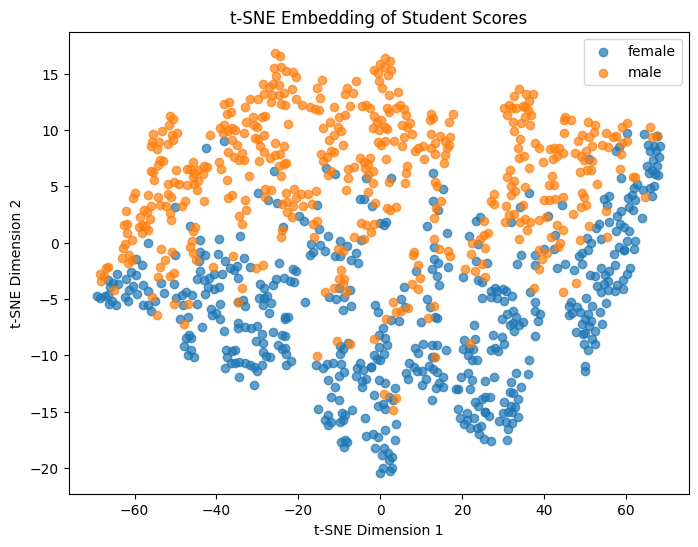

In [7]:
tsne = TSNE(n_components=2, random_state=42, learning_rate=100)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
for i, label, color in zip([0,1], ['female', 'male'], ['#1f77b4', '#ff7f0e']):
    plt.scatter(X_tsne[y==i,0], X_tsne[y==i,1], label=label, alpha=0.7, c=color)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Embedding of Student Scores')
plt.legend()
plt.show()

**Observation:**
- t-SNE forms tighter clusters by gender than PCA, especially for female students.
- t-SNE better preserves local groupings, while PCA explains more global variance.